# Disney+ Movies and TV Shows clustering
Tarea realizada por: Rebeca Amor

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Este ejercicio es un script de Python que carga un conjunto de datos en un marco de datos y realiza algunas operaciones de limpieza y transformación de datos. Luego, utiliza técnicas de análisis de clusterización para agrupar los datos en clústeres basados en sus características y muestra la cantidad óptima de clústeres utilizando diferentes métodos vistos en clase.

El conjunto de datos utilizado es un archivo CSV llamado "disney_plus_titles.csv". El código utiliza la biblioteca pandas para cargar el archivo CSV en un marco de datos y realiza algunas operaciones de limpieza y transformación de datos para que el archivo CSV sea más fácil de trabajar.

Para construirlo, se ha aplicado la técnica de análisis de componentes principales (PCA) para reducir el número de dimensiones de los datos, lo que facilita la agrupación de los datos en clústeres. Luego, utilizamos la técnica de clusterización de K-Means para agrupar los datos en clústeres. El código utiliza la técnica de "codo" (elbow) para determinar la cantidad óptima de clústeres. Finalmente, se muestra un gráfico que representa la cantidad de clústeres en el eje X y la suma de las distancias cuadradas de los puntos de datos al centro del clúster más cercano en el eje Y.

## Análisis y preparación de los datos

Para empezar, el primer paso es importar las librerías necesarias.

In [85]:
# Importación de librerías a utilizar
import sys
import sklearn
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import LogNorm
from sklearn.mixture import BayesianGaussianMixture

Los datos están en formato CSV, para cargarlos en el entorno de Python utilizaremos la librería Pandas.

In [86]:
# Leemos y mostramos algunas columnas del dataset
disneyplus=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/disney_plus_titles.csv', index_col=0)
disneyplus.sample(20)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1029,Movie,Magician Mickey,David Hand,"Pinto Colvig, Walt Disney, Clarence Nash",United States,"November 12, 2019",1937,TV-PG,8 min,"Animation, Comedy, Family",Donald continually heckles Mickey's magic act....
s722,Movie,Alice in Wonderland,"Clyde Geronimi, Hamilton Luske, Wilfred Jackson","Ed Wynn, Richard Haydn, Sterling Holloway, Jer...",United States,"November 12, 2019",1951,G,79 min,"Action-Adventure, Animation, Family",Join Alice as she chases the White Rabbit into...
s1189,Movie,Sharks of Lost Island,NaN,Chris McLinden,United States,"November 12, 2019",2013,TV-PG,45 min,"Action-Adventure, Animals & Nature, Documentary",A team of explorers sets out to explore the se...
s478,Movie,X-Men: Days of Future Past,Bryan Singer,"Hugh Jackman, James McAvoy, Michael Fassbender...","United States, United Kingdom, Canada","July 10, 2020",2014,PG-13,132 min,"Action-Adventure, Family, Science Fiction",Characters from the X-Men trilogy join their y...
s688,Movie,One Day at Disney,Fritz Mitchell,NaN,United States,"December 3, 2019",2019,TV-PG,62 min,"Documentary, Family",Discover the inspiring personal stories of the...
s442,Movie,Prince of Persia: The Sands of Time,Mike Newell,"Jake Gyllenhaal, Ben Kingsley, Gemma Arterton,...",United States,"August 7, 2020",2010,PG-13,117 min,"Action-Adventure, Fantasy",A rogue prince and rival princess safeguard a ...
s1105,Movie,Newsies: The Broadway Musical,"Jeff Calhoun, Brett Sullivan","Jeremy Jordan, Kara Lindsay, Ben Fankhauser, A...",United States,"November 12, 2019",2017,PG,134 min,"Coming of Age, Drama, Family",Gutsy newsboys take on newspaper titans in 189...
s1014,Movie,Lend a Paw,Clyde Geronimi,NaN,United States,"November 12, 2019",1941,TV-Y7,8 min,"Animation, Family, Kids",Pluto's jealousy of a kitten leaves him confli...
s1181,Movie,Science Fair,"Cristina Costantini, Darren Foster","Anjali Chadha, Ryan Folz, Harsha Paladugu, Abr...",United States,"November 12, 2019",2018,PG,91 min,"Documentary, Family",Nine high school students compete at the Inter...


Una vez que tenemos los datos cargados en un DataFrame de Pandas, podemos comenzar a explorarlos y hacer las transformaciones necesarias para nuestro análisis.

In [87]:
# Comprobamos los tipos de datos
disneyplus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, s1 to s1450
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   title         1450 non-null   object
 2   director      977 non-null    object
 3   cast          1260 non-null   object
 4   country       1231 non-null   object
 5   date_added    1447 non-null   object
 6   release_year  1450 non-null   int64 
 7   rating        1447 non-null   object
 8   duration      1450 non-null   object
 9   listed_in     1450 non-null   object
 10  description   1450 non-null   object
dtypes: int64(1), object(10)
memory usage: 135.9+ KB


Continuamos echando un vistazo a los valores nulos.

In [88]:
# Verificamos los valores nulos
disneyplus.isna().sum()

type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [89]:
# Total de valores nulos
disneyplus.isna().sum().sum()

888

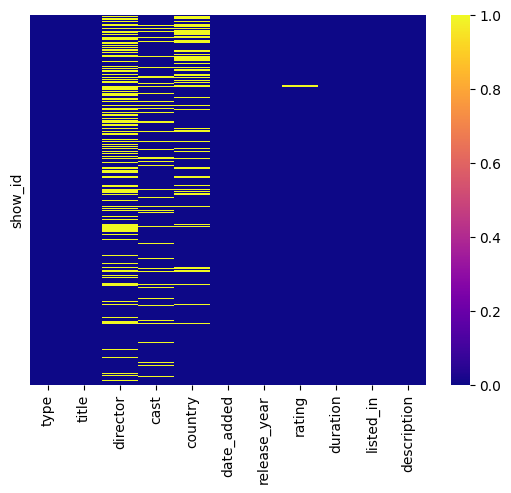

In [90]:
# Visualizamos los NaN como gráfica
sns.heatmap(disneyplus.isna(), yticklabels=False, cmap='plasma');

El siguiente paso es reemplazar los valores faltantes o "NaN" en la columna "rating" del DataFrame con el valor más frecuente en esa columna.

El valor más frecuente se almacena en la variable "r", y luego se utiliza el método "fillna()" de Pandas para reemplazar los valores faltantes.

In [91]:
# Reemplazamos los valores NaN en la columna de calificación (previa copia del dataset original)
disney=disneyplus.copy()

r=disney['rating'].mode()[0]
disney['rating'].fillna(r,inplace=True)

disney.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, s1 to s1450
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   title         1450 non-null   object
 2   director      977 non-null    object
 3   cast          1260 non-null   object
 4   country       1231 non-null   object
 5   date_added    1447 non-null   object
 6   release_year  1450 non-null   int64 
 7   rating        1450 non-null   object
 8   duration      1450 non-null   object
 9   listed_in     1450 non-null   object
 10  description   1450 non-null   object
dtypes: int64(1), object(10)
memory usage: 135.9+ KB


In [92]:
disney.isna().sum()

type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [93]:
# 😈
disney.isna().sum().sum()

885

Ahora preparamos las columnas de 'duration' y 'director'.

Primero, se utiliza el método apply con una función lambda para eliminar el texto innecesario de la columna 'duration', que contiene información sobre la duración de las películas y series en el formato 'X Seasons' o 'X min'. Después de eliminar el texto innecesario, se utiliza el método astype para convertir el tipo de datos de la columna 'duration' en un entero.

In [94]:
# Convertimos las temporadas y los minutos de la columna 'duration' (duración) y convertimos la columna en int
disney['duration']=disney['duration'].apply(lambda x: x.replace(' min','').replace(' Seasons','').replace(' Season',''))
disney['duration']=disney['duration'].astype(int)

Luego, se utiliza un bucle for para iterar a través de cada fila en el dataframe. En cada iteración, la cadena de la columna 'director' se divide en una lista utilizando el método split con ',' como separador.

A continuación, se utiliza una comprensión de lista para eliminar los espacios en blanco adicionales de cada elemento en la lista resultante.

Finalmente, se utiliza el método explode para convertir cada elemento de la lista en una fila separada, replicando los valores de las otras columnas en cada fila nueva. Por último, se utiliza el método reset_index para reindexar las filas del dataframe de forma consecutiva, comenzando desde 0.

In [95]:
# Aquí preparamos la columna director
# En las columnas que haya más de uno, los separamos
for index, row in disney.iterrows():
    directors=str(row['director']).split(',')
    directors=[director.strip() for director in directors]
    disney.at[index, 'director']=directors
disney=disney.explode('director')
disney.reset_index(drop=True, inplace=True)

Ahora, se eliminan las columnas 'cast', 'country' y 'description' del dataframe, ya que no son necesarias para el análisis que se va a realizar. El parámetro axis=1 especifica que las columnas deben ser eliminadas en lugar de las filas. El dataframe resultante se guarda en la variable clean_disney.

In [96]:
# Borramos columnas innecesarias para el análisis
clean_disney=disney.drop(['cast','country','description'], axis=1)

In [97]:
# Comprobamos las columnas que quedaron
clean_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1594 non-null   object
 1   title         1594 non-null   object
 2   director      1594 non-null   object
 3   date_added    1591 non-null   object
 4   release_year  1594 non-null   int64 
 5   rating        1594 non-null   object
 6   duration      1594 non-null   int64 
 7   listed_in     1594 non-null   object
dtypes: int64(2), object(6)
memory usage: 99.8+ KB


A continuación agrupamos la columna de "rating" está en cuatro categorías: "Todos los públicos", "Adulto", "Joven" e "Infantil", dependiendo del valor de la calificación de la película o serie.

In [98]:
# Agrupamos ahora la calificación por edad
clean_disney['rating']=clean_disney['rating'].apply(lambda x: 'Todos los públicos' if x in ['TV-G', 'G'] else 'Adulto' if x in ['TV-PG', 'PG'] else 'Joven' if x in ['TV-14', 'PG-13'] else 'Infantil' if x in ['TV-Y', 'TV-Y7', 'TV-Y7-FV'] else 'Sin calificación')

## Visualización

La visualización de datos es una parte fundamental del análisis de datos y la ciencia de datos, ya que permite a los analistas y científicos de datos identificar patrones, tendencias y relaciones ocultas en los datos que pueden no ser evidentes en un formato tabular o numérico. Además, la visualización de datos también puede ser útil para identificar valores atípicos, errores y problemas en los datos.

El siguiente código utiliza la librería de visualización de datos Seaborn para crear un gráfico de barras del número de títulos por calificación de edad. El eje X representa las diferentes calificaciones de edad y el eje Y muestra el número de títulos correspondientes a cada calificación. Se utiliza la función countplot() de Seaborn para contar el número de películas en cada calificación y representarlas en un gráfico de barras.

Además, se ordenan las calificaciones en el eje X de acuerdo al orden especificado en el parámetro order y se agrega un título al gráfico utilizando la función title() de Matplotlib. Finalmente, se muestra el gráfico utilizando la función show() de Matplotlib.

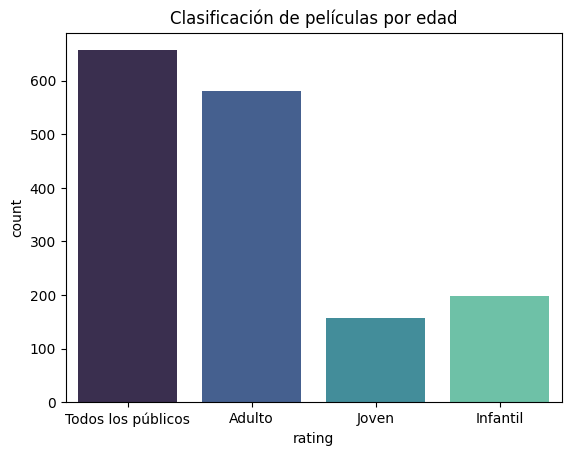

In [99]:
# Gráfico de número de títulos por calificación de edad
sns.countplot(x='rating', data=clean_disney, palette='mako',order=['Todos los públicos','Adulto','Joven','Infantil'])
plt.title('Clasificación de películas por edad')
plt.show()

En el siguiente gráfico de barras que muestra la cantidad de películas y series en el dataset para cada una de las calificaciones de edad ('Todos los públicos', 'Adulto', 'Joven' e 'Infantil'). Además, utiliza la función hue de seaborn para diferenciar entre películas y series en el gráfico.

Es útil para tener una idea general de cómo se distribuyen las películas y series en términos de su clasificación de edad y su tipo, lo que puede ser útil para realizar análisis.

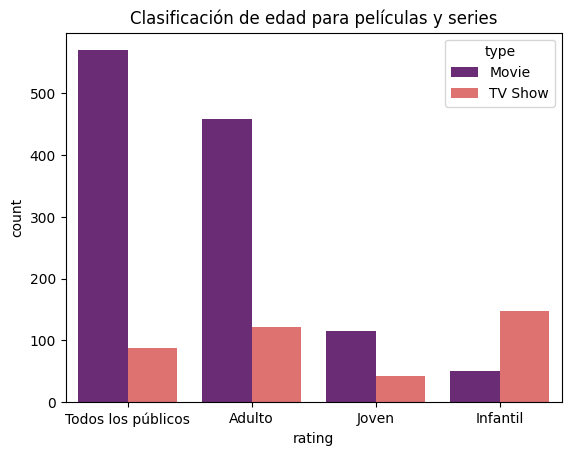

In [100]:
# Gráfico de películas y series según su calificación de edad
sns.countplot(x='rating', data=clean_disney,hue='type', palette='magma',order=['Todos los públicos','Adulto','Joven','Infantil'])
plt.title('Clasificación de edad para películas y series')
plt.show()

Vamos a visualizar a continuación unos gráficos atendiendo a la duración de las películas y las series.
Para ello, ajustamos la duración de las mismas.

Como primer paso agrupamos las películas de Disney+ por año de lanzamiento y se calcula la duración media de las películas en cada año.

In [101]:
# Agrupamos las películas por año y le asociamos su duración
clean_disney['type']=='Movie'
movies_df=clean_disney[clean_disney['type']=='Movie']
movies_df['duration'].astype(float)
movies_df_time=movies_df.groupby('release_year', as_index=False)['duration'].mean()
movies_df_time

,release_year,duration
0,1928,8.000000
1,1932,7.666667
2,1933,8.666667
3,1934,8.750000
4,1935,9.800000
...,...,...
85,2017,77.923077
86,2018,84.315789
87,2019,62.797101
88,2020,66.725000


Y aquí se hace lo mismo con las series.

In [102]:
# Agrupamos las series por su año y le asociamos su duración
clean_disney['type']=='TV Show'
series_df=clean_disney[clean_disney['type']=='TV Show']
series_df['duration'].astype(float)
series_df_time=series_df.groupby('release_year', as_index=False)['duration'].mean()
series_df_time

,release_year,duration
0,1955,1.000000
1,1973,6.000000
2,1976,5.000000
3,1979,1.000000
4,1982,1.000000
5,1985,3.333333
6,1988,4.000000
7,1989,14.000000
8,1990,1.000000
9,1991,3.000000


In [103]:
# Comprobamos las columnas que tenemos
clean_disney.columns

Index(['type', 'title', 'director', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in'],
      dtype='object')

Gráfico que muestra la duración promedio de las películas de Disney en función del año de lanzamiento.

Text(0.5, 1.0, 'Duración de películas Disney de 1920 a 2021')

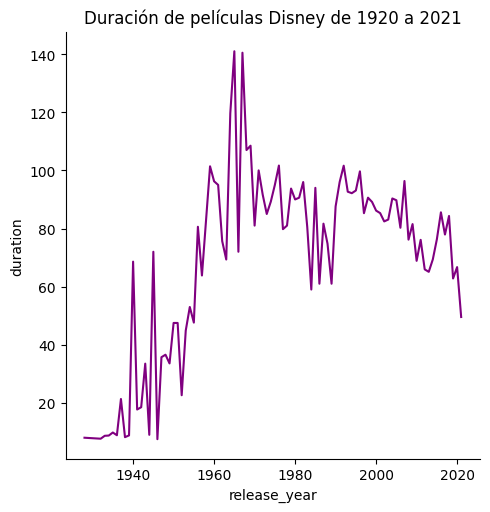

In [104]:
# Duración de las películas de Disney desde 1920
sns.relplot(data=movies_df_time, x="release_year", y="duration", kind="line", color="purple")
plt.title('Duración de películas Disney de 1920 a 2021')

Observamos que entre 1960 y 1970 tuvieron se lanzaron las películas más largas.

Gráfico que muestra la duración promedio de las series de TV en función del año de lanzamiento.

Text(0.5, 1.0, 'Duración de series Disney de 1920 a 2021')

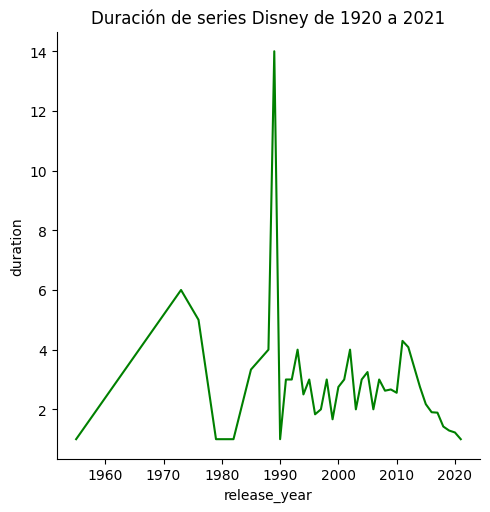

In [105]:
# Duración de las series de Disney desde 1920
sns.relplot(data=series_df_time, x="release_year", y="duration", kind="line", color="green")
plt.title('Duración de series Disney de 1920 a 2021')

La serie más larga de Disney tuvo su lanzamiento en 1990.

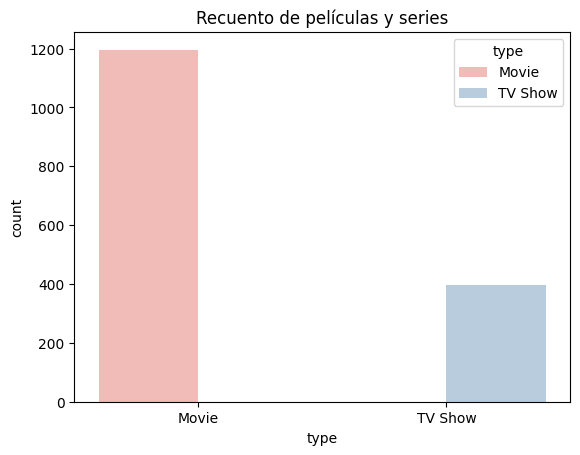

In [106]:
sns.countplot(x='type',data=disney,hue='type', palette='Pastel1',)
plt.title('Recuento de películas y series')
plt.show()

Vemos que hay muchas más películas que series publicadas en la plataforma.

Ahora haremos una comparación entre películas y series según su género.
Para ello creamos nuevas columnas booleanas para indicar si cada título incluye ciertos géneros, como comedia, ciencia ficción, romance, animación, drama, musical y acción. Esto se hace usando la función apply con una función anónima que busca cada género en la columna "listed_in" y devuelve un 1 si lo encuentra y un 0 si no.

In [107]:
clean_disney['Comedy']=clean_disney['listed_in'].apply(lambda x: 1 if 'comedy' in x.lower() else 0)
clean_disney['Science_Fiction']=clean_disney['listed_in']. apply(lambda x: 1 if 'science fiction' in x.lower() else 0)
clean_disney['Romance']=clean_disney['listed_in'].apply(lambda x: 1 if 'romance' in x.lower() else 0)
clean_disney['Animation']=clean_disney['listed_in'].apply(lambda x: 1 if 'animation' in x.lower() else 0)
clean_disney['Drama']=clean_disney['listed_in'].apply(lambda x: 1 if 'drama' in x.lower() else 0)
clean_disney['Musical']=clean_disney['listed_in'].apply(lambda x: 1 if 'musical' in x.lower() else 0)
clean_disney['Action']=clean_disney['listed_in'].apply(lambda x: 1 if 'action-adventure' in x.lower() else 0)
clean_disney.columns

Index(['type', 'title', 'director', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'Comedy', 'Science_Fiction', 'Romance',
       'Animation', 'Drama', 'Musical', 'Action'],
      dtype='object')

Este código genera una figura que muestra la cantidad de películas y programas de televisión de Disney+ por género. Para hacer esto, primero se define un DataFrame llamado comparison_df que se indexa por type (película o programa de televisión). Luego, se seleccionan las columnas del DataFrame que contienen información sobre los géneros, que son Comedy, Romance, Drama, Action, Musical, Animation y Science_Fiction. Se agrupa el DataFrame por type y se suman los valores de cada género para obtener la cantidad total de películas y programas de televisión por género.

Después, se crea un nuevo DataFrame genre_df que combina las columnas type, Genre y Count. La columna type representa el tipo de contenido (película o programa de televisión), Genre representa los géneros de las películas y programas de televisión y Count representa el número de películas y programas de televisión que se ajustan a cada género.

Por último, se utiliza sns.catplot para crear un gráfico de barras con la información de genre_df. El eje y representa los géneros, el eje x representa la cantidad de películas y programas de televisión, y se utiliza el parámetro hue para diferenciar entre películas y programas de televisión. La función plt.title se utiliza para agregar un título al gráfico.

<ipython-input-108-49082a917687>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre=comparison_df.groupby('type')['Comedy','Romance','Drama','Action','Musical','Animation','Science_Fiction'].sum().reset_index()


<Figure size 2000x1000 with 0 Axes>

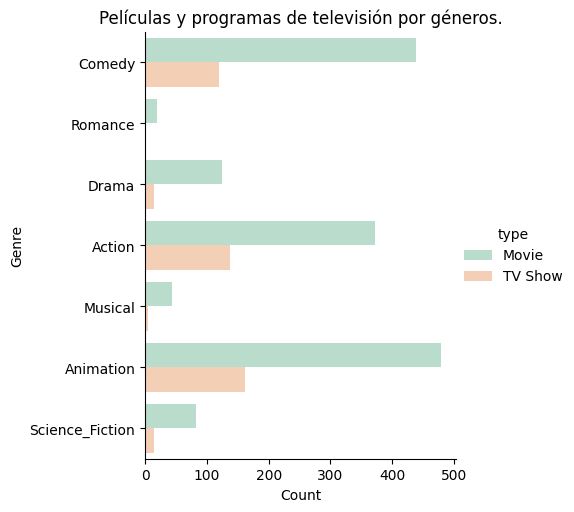

In [108]:
plt.figure(figsize=(20,10))
comparison_df=clean_disney.set_index('type')
comparison_df.iloc[:,9:15]
genre=comparison_df.groupby('type')['Comedy','Romance','Drama','Action','Musical','Animation','Science_Fiction'].sum().reset_index()
genre_df=genre.melt(id_vars='type',value_vars=['Comedy','Romance','Drama','Action','Musical','Animation', 'Science_Fiction'],var_name='Genre', value_name='Count',ignore_index=False)
sns.catplot(data=genre_df, x='Count', y='Genre',hue='type',kind='bar',palette='Pastel2',height=5)
plt.title('Películas y programas de televisión por géneros.')
#plt.xticks(rotation=45)
plt.show();

## Entrenamiento

El entrenamiento para encontrar clústers no implica el uso de datos etiquetados o predefinidos, sino que se basa únicamente en la información contenida en los datos de películas y series de Disney Plus, lo que permite descubrir patrones y relaciones de forma exploratoria y no supervisada.

### Tratamiento de las variables

En primer lugar, es necesario preparar los datos, seleccionando las variables relevantes para el análisis y eliminando valores faltantes o inconsistentes.

In [109]:
clean_disney.columns

Index(['type', 'title', 'director', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'Comedy', 'Science_Fiction', 'Romance',
       'Animation', 'Drama', 'Musical', 'Action'],
      dtype='object')

Aquí toca convertir las columnas de texto en columnas de valores numéricos.

La función str.get_dummies se utiliza para convertir columnas de texto como "title", "director", "type", "date_added", "rating" y "listed_in" en varias columnas booleanas que indican si cada título pertenece a una categoría determinada. Después de cada transformación, las nuevas columnas booleanas se concatenan con el conjunto de datos original y las columnas de texto originales se eliminan con la función drop.

In [110]:
# Convertimos las columnas string
title=clean_disney['title'].str.get_dummies()
clean_disney=pd.concat([clean_disney, title], axis=1)
clean_disney=clean_disney.drop(['title'], axis=1)

dir=clean_disney['director'].str.get_dummies()
clean_disney=pd.concat([clean_disney, dir], axis=1)
clean_disney=clean_disney.drop(['director'], axis=1)

tp=clean_disney['type'].str.get_dummies()
clean_disney=pd.concat([clean_disney, tp], axis=1)
clean_disney=clean_disney.drop(['type'], axis=1)

date=clean_disney['date_added'].str.get_dummies()
clean_disney=pd.concat([clean_disney, date], axis=1)
clean_disney=clean_disney.drop(['date_added'], axis=1)

rat=clean_disney['rating'].str.get_dummies()
clean_disney=pd.concat([clean_disney, rat], axis=1)
clean_disney=clean_disney.drop(['rating'], axis=1)

listed=clean_disney['listed_in'].str.get_dummies(sep=', ')
clean_disney=pd.concat([clean_disney, listed], axis=1)
clean_disney=clean_disney.drop(['listed_in'], axis=1)

In [111]:
clean_disney.shape

(1594, 2312)

Una vez preparados los datos, comenzaremos por la búsqueda de clústers posibles que se pueden encontrar en el dataset preparado.

### PCA

Realizaremos un análisis de componentes principales (PCA) para determinar el número óptimo de dimensiones que se deben usar para reducir la dimensionalidad del conjunto de datos.

In [112]:
# Buscamos el número idóneo de dimensiones
pca=PCA()
pca.fit(clean_disney)
cumsum=np.cumsum(pca.explained_variance_ratio_)
dim=np.argmax(cumsum >= 0.95) + 1
dim

2

Este código busca encontrar el número óptimo de dimensiones para reducir la dimensionalidad de clean_disney mientras se mantiene la mayor cantidad de información posible.

### KMeans

La técnica K-means es un algoritmo de aprendizaje no supervisado utilizado para agrupar un conjunto de datos en k clústeres. El algoritmo comienza con la selección de k centroides aleatorios. Luego, cada punto de datos se asigna al centroide más cercano, y se recalcula el centroide para cada clúster. Este proceso se repite hasta que no hay cambios en la asignación de clústeres o se alcanza un número máximo de iteraciones. La asignación de clústeres se realiza minimizando la suma de las distancias al cuadrado entre cada punto de datos y su centroide asignado. Al final del proceso, el algoritmo devuelve los centroides finales y las asignaciones de clúster para cada punto de datos. El objetivo de K-means es minimizar la distancia entre los puntos de datos y su centroide asignado.

Para poner esto en práctica, utilizaremos la técnica del "codo" para determinar el número óptimo de clústers en un conjunto de datos. La técnica del codo se basa en el principio de que al aumentar el número de clústers, la suma de las distancias al cuadrado de cada muestra al centroide más cercano también aumentará.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Inertia')

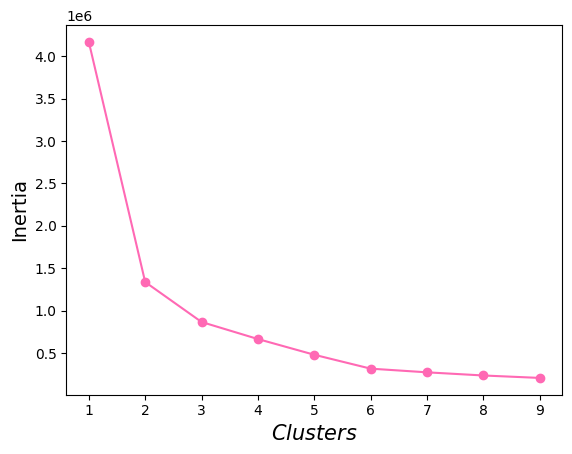

In [113]:
# Utilizamos la técnica del "codo" (elbow) para encontrar el número óptimo de clústers
kmeans_k=[KMeans(n_clusters=k, random_state=42).fit(clean_disney) for k in range(1, 10)]
inertias=[model.inertia_ for model in kmeans_k]

plt.plot(range(1, 10), inertias, "bo-", color='hotpink')
plt.xlabel("$Clusters$", fontsize=15)
plt.ylabel("Inertia", fontsize=14)

En el gráfico del "codo" parece que el número de clústers que nos indica con más precisión son dos, coincidiendo con el resultado del PCA, ya que la línea cambia de dirección justo en ese número. Pero si nos fijamos bien, vemos otros dos puntos de inflesión en cuatro y seis.

### Silhouette_score

Vamos a evaluar y representar gráficamente el puntaje de la silueta para los diferentes valores de k (número de clusters) hallados en el k-means ejecutado antes.

Un score alto indica que los objetos dentro de un cluster son muy similares entre sí y muy diferentes de los objetos de otros clusters, lo que es deseable en una buena clusterización. En este caso, se están evaluando los scores para el rango de 2 a 9 clusters.

<ipython-input-114-37cdf8032484>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2, 10), silhouette_scores, "bo-", color="purple")


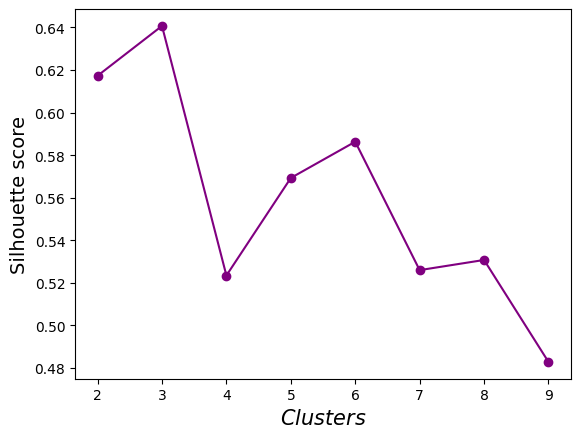

In [114]:
# Evaluamos la calidad de la clusterización que nos ha arrojado el modelo k-means
silhouette_scores=[silhouette_score(clean_disney, model.labels_) for model in kmeans_k[1:]]

plt.plot(range(2, 10), silhouette_scores, "bo-", color="purple")
plt.ylabel("Silhouette score", fontsize=14)
plt.xlabel("$Clusters$", fontsize=15)
plt.show()

En esta gráfica podemos ver que, a diferencia del 'elbow' anterior, sugiere tres clústers como el número óptimo.
Y parece encontrar otra agrupación de seis, que es donde vemos otro pico en la representación.
Con esta información presente, continuamos con el análisis.

A continuación se hace una clusterización y evalúa la calidad de la misma, y luego reduce la dimensión del conjunto de datos y visualiza los clusters obtenidos en un gráfico de dos dimensiones.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

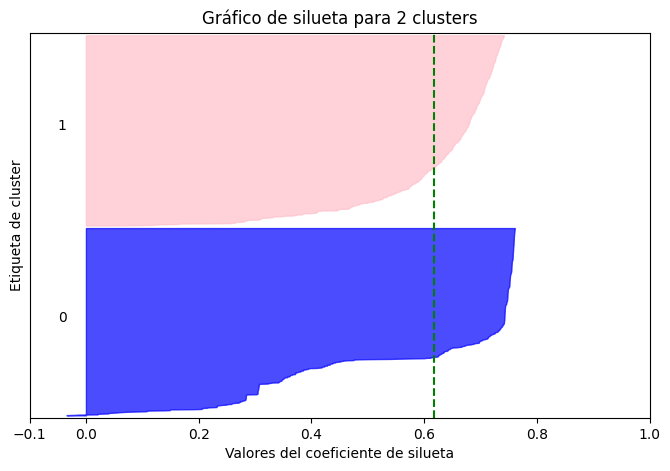

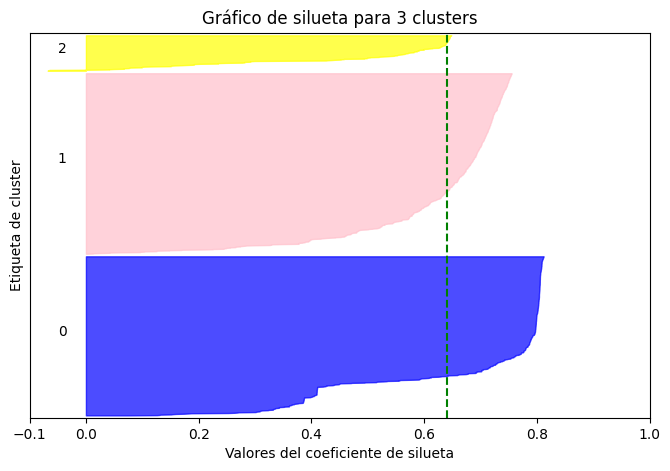

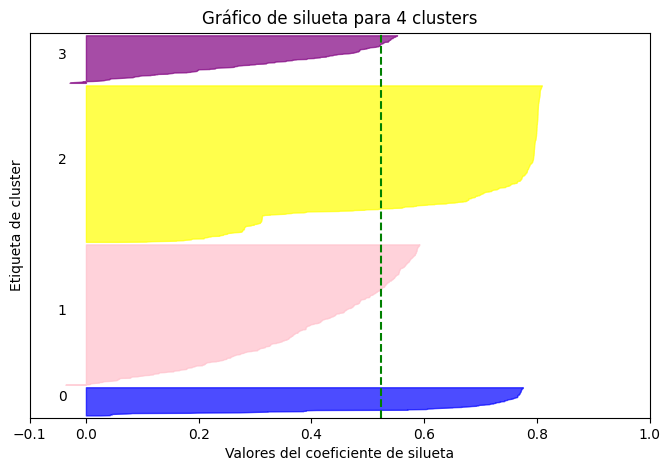

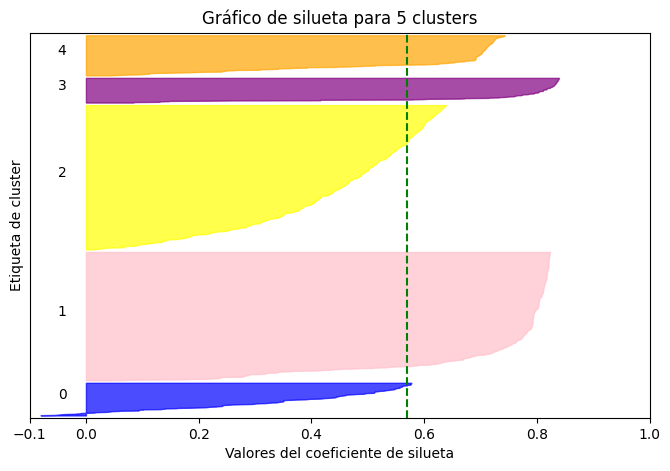

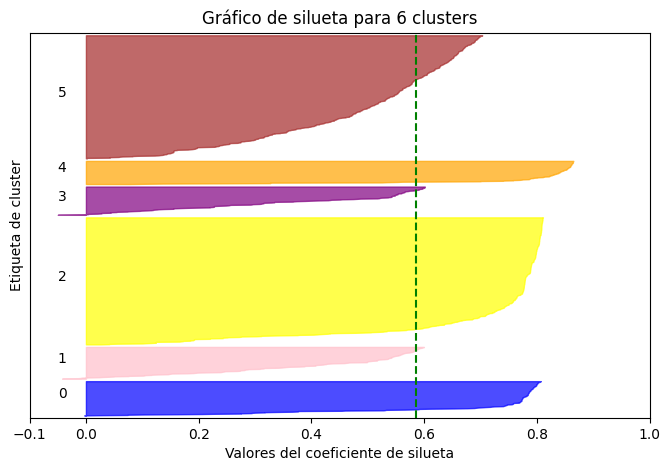

In [115]:
# Primero, se define el conjunto de datos de entrenamiento
# Luego, se utiliza un bucle para ajustar diferentes modelos de k-means con 2 a 6 clusters
# Y, por último, mostramos los resultados

training_dt=clean_disney
colors=['blue', 'pink', 'yellow', 'purple', 'orange', 'brown']
for j in range(2, 7):
    n_clusters=j
    km=KMeans(j, random_state=10)
    cluster_labels=km.fit_predict(training_dt)
    silhouette_avg=silhouette_score(training_dt, cluster_labels)
    sample_silhouette_values=silhouette_samples(training_dt, cluster_labels)
    fig, (ax1)=plt.subplots(1,1)
    fig.set_size_inches(8, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(training_dt) + (n_clusters + 1) * 10])
    y_lower=10

    for i in range(j):
        ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=colors[i]
        #color=mpl.cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0 , ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower+0.5*size_cluster_i, str(i))
        y_lower=y_upper+10
        ax1.set_title("Gráfico de silueta para {} clusters".format(i+1))
        ax1.set_xlabel("Valores del coeficiente de silueta")
        ax1.set_ylabel("Etiqueta de cluster")
    ax1.axvline(x=silhouette_avg, color="green", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

### TSNE

A continuación, aplicamos la técnica de TSNE para descubrir patrones, relaciones y estructuras subyacentes que pueda haber en los datos.

t-SNE es una técnica de reducción de dimensionalidad que permite visualizar datos en un espacio de menor dimensión de tal manera que se conserven las relaciones entre los datos.

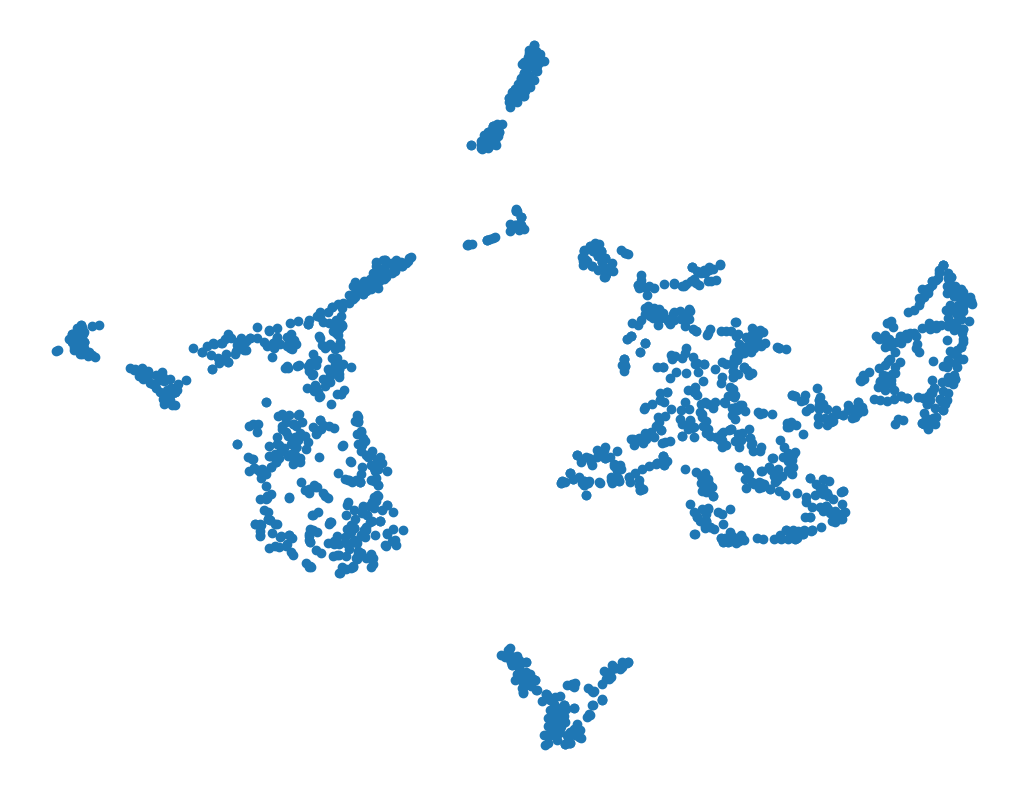

In [116]:
# Reducimos la dimensión manteniendo las relaciones entre los puntos y preservando la estructura
# y visualizamos la gráfica para observar el resultado
tsne=TSNE(n_components=2, random_state=42)
X_reduced=tsne.fit_transform(clean_disney)

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.axis('off')
plt.show()

Por lo que parece, se distinguen cuatro grupos: dos grandes en el centro de la gráfica y otros dos más pequeños arriba y abajo.

### DBSCAN

Con DBSCAN comprobamos el resultado arrojado en el análisis anterior.

La técnica DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un método de clustering que se basa en la densidad de los puntos. En lugar de especificar el número de clústers que se quieren, se define un radio y un número mínimo de puntos cercanos para que un punto sea considerado parte de un clúster. Los puntos que no cumplen con estas condiciones se consideran ruido.

In [117]:
# Definimos la función
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask=np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_]=True
    anomalies_mask=dbscan.labels_==-1
    non_core_mask=~(core_mask | anomalies_mask)

    cores=dbscan.components_
    anomalies=X[anomalies_mask]
    non_cores=X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Pastel1")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="X", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

DBSCAN tiene como ventaja que puede identificar clústers de forma no lineal y no es sensible a la forma de los clústers. Además, es capaz de identificar puntos aislados que no pertenecen a ningún clúster.

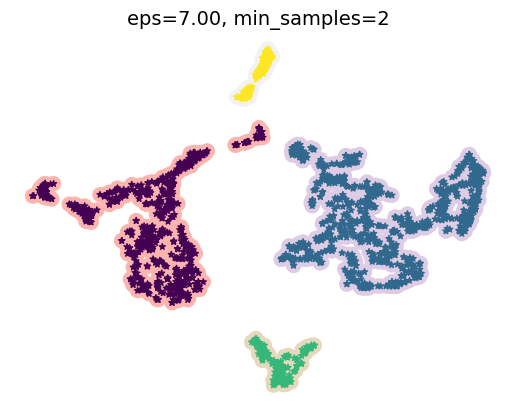

In [118]:
# Establecemos dos muestras como mínimo porque es el dato que nos dio el PCA,
# pero podríamos establecer también tres y el resultado sería el mismo
dbscan=DBSCAN(eps=7, min_samples=2)
dbscan.fit(X_reduced)
plot_dbscan(dbscan, X_reduced, size=100)
plt.axis('off')
plt.show()

Y, efectivamente, se aprecian perfecatmente cuatro clústers bien diferenciados.

### KNN

Utilizaremos el método K-Nearest Neighbors para trazar las fronteras de decisión del modelo de clustering DBSCAN anterior que vimos.

In [119]:
# Definimos las funciones
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids=centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=False, show_xlabels=True, show_ylabels=True):
    mins=X.min(axis=0)-0.1
    maxs=X.max(axis=0)+0.1
    xx, yy=np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z=clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="cool")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

KNN utiliza la cercanía de los puntos de datos para clasificar nuevos puntos en categorías predefinidas.

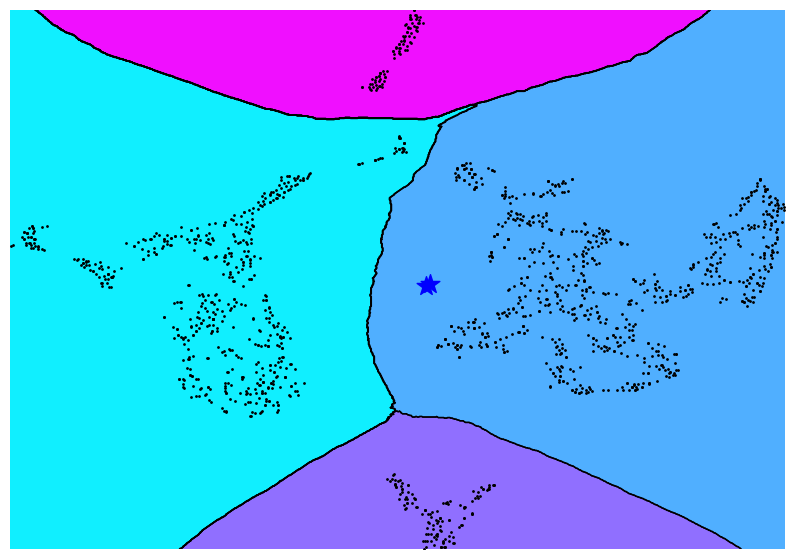

In [120]:
# Visualizamos los resultados
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_[:, :2], dbscan.labels_[dbscan.core_sample_indices_])
X_new=np.array([[-0.5, 0], [0, 0.5]])
plt.figure(figsize=(10, 7))
plot_decision_boundaries(knn, X_reduced, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="*", s=200, zorder=10)
plt.axis('off')
plt.show()

Con esto definitivamente confirmamos que obtenemos cuatro clústers.

### Gaussian Mixture

Usaremos la técnica de Gaussian Mixture para identificar agrupaciones en datos basados en distribuciones de probabilidad.

In [121]:
# Definimos la función
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins=X.min(axis=0)-0.1
    maxs=X.max(axis=0)+0.1
    xx, yy=np.meshgrid(np.linspace(mins[0], maxs[0], resolution),np.linspace(mins[1], maxs[1], resolution))
    Z=-clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), cmap='winter')
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='purple')
    Z=clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='b');
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

El algoritmo comienza asignando un número aleatorio de clusters y luego estima los parámetros de las distribuciones gaussianas para cada uno de ellos. A continuación, los datos se asignan a los clusters que mejor se ajustan a su distribución, utilizando el teorema de Bayes para estimar la probabilidad de pertenecer a cada uno de los clusters.

Este proceso se repite varias veces hasta que se alcanza una convergencia en los parámetros estimados de las distribuciones gaussianas y en la asignación de los datos a los clusters correspondientes.

A diferencia del algoritmo de k-means, la técnica de Gaussian Mixture permite la asignación de probabilidades a cada punto de datos para pertenecer a cada uno de los clusters, lo que puede ser útil en algunas aplicaciones. También puede manejar clusters con formas complejas y superposiciones de datos, lo que lo hace adecuado para un amplio rango de problemas de clustering.

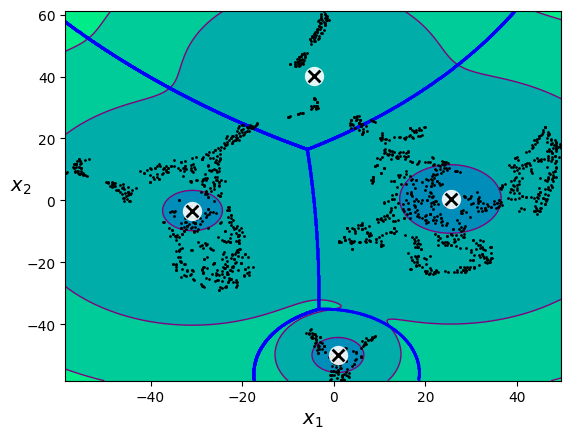

In [122]:
gm=GaussianMixture(n_components=4, n_init=100, covariance_type="spherical", random_state=42)
gm.fit(X_reduced)
plot_gaussian_mixture(gm, X_reduced)
plt.show()

### Bayesian Gaussian Mixture

Bayesian Gaussian Mixture utiliza un enfoque probabilístico para determinar las mezclas óptimas de estas distribuciones, lo que permite que los datos se agrupen de manera más flexible que en otros algoritmos de clustering.

A diferencia de otros métodos de clustering, este enfoque permite que un punto de datos pertenezca a más de un clúster, lo que refleja mejor la complejidad de la realidad.

Además, la técnica utiliza el teorema de Bayes para calcular la probabilidad posterior de las mezclas, lo que permite que el modelo ajuste la complejidad del modelo a medida que se agregan nuevos datos.

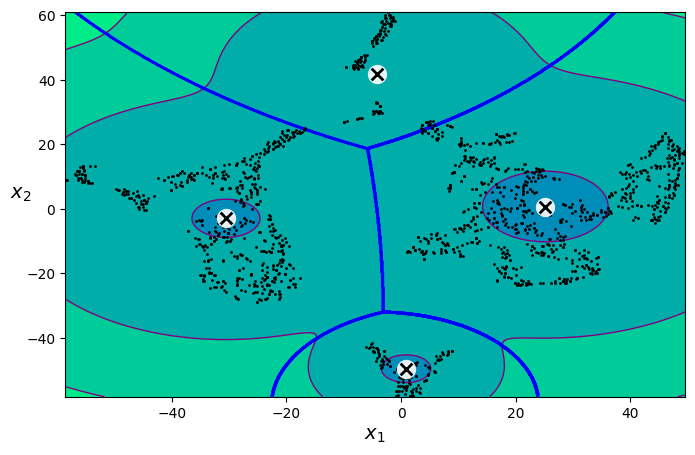

In [123]:
bgm=BayesianGaussianMixture(n_components=4, n_init=100, covariance_type = "spherical", random_state=42)
bgm.fit(X_reduced)
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X_reduced)
plt.show()

Las dos técnicas gaussianas arrojan prácticamente el mismo resultado, localizándose en punto central en el mismo núcleo del clúster.
Por lo que podemos concluir que, efectivamente, cuatro clústers parecen ser los más acertados.

Esto puede ser una indicación de que los datos tienen una estructura clara y que los parámetros de la distribución subyacente son relativamente robustos, independientemente de la elección de una distribución a priori específica.

## Representación final

Tras analizar las variables y probar varias representaciones con ellas, podemos llegar a la conclusión que los clústers corresponden a estas columnas: 'TV shows' (y su contrario 'Movie'), 'release_year', 'Documentary' y 'duration'.

<Figure size 1300x1000 with 0 Axes>

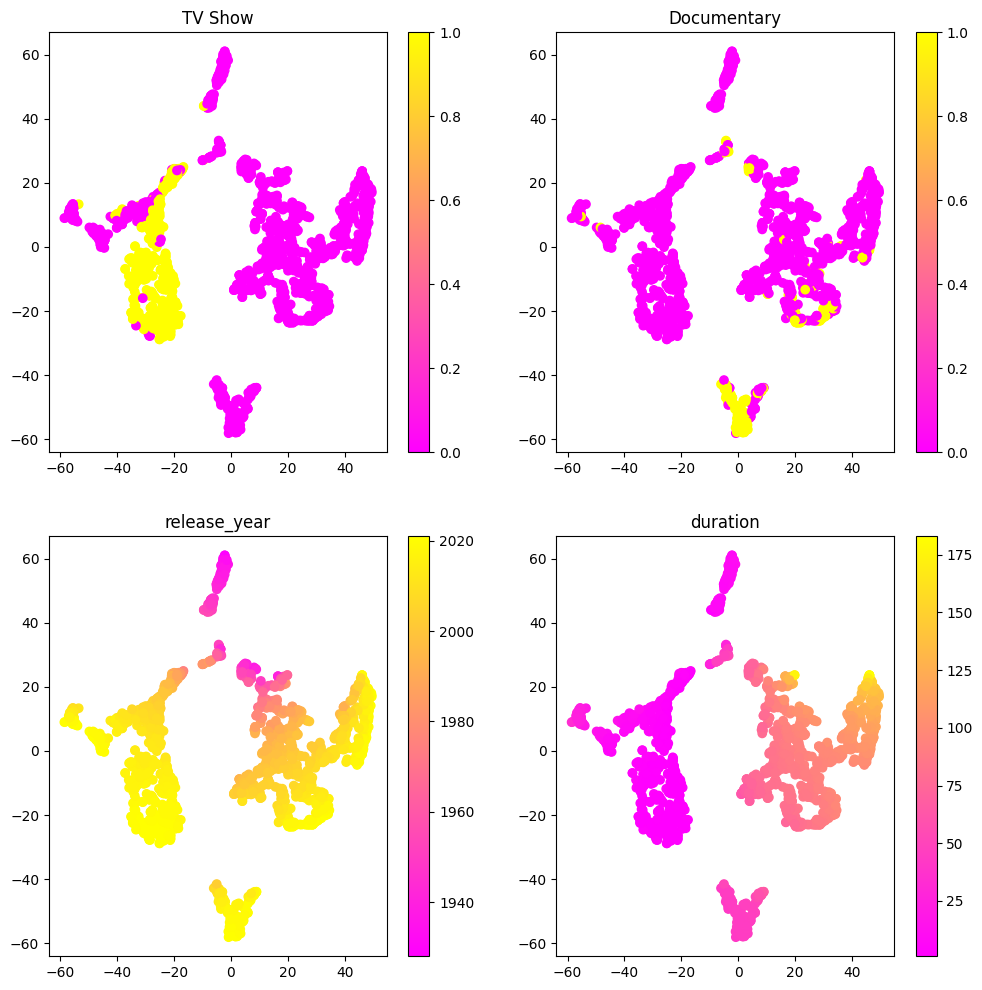

In [124]:
cluster_id=['TV Show','release_year','Documentary','duration']

plt.figure(figsize=(13,10))
fig, axes=plt.subplots(2,2, figsize=(12,12))
x,y=0,0

for i in cluster_id:
  scatter=axes[x,y].scatter(X_reduced[:, 0], X_reduced[:, 1], c=clean_disney[f'{i}'], cmap="spring")
  axes[x,y].set_title(f"{i}")
  fig.colorbar(scatter, ax=axes[x,y])
  x=x+1
  if x==2:
    x=0
    y=1

plt.show()

Podemos concluir que los clústers que mejor detecta son los correspondientes a los datos del tipo series (y, por consiguiente su contrario, películas), documentales, duración y año de estreno.

Esto puede significar que los atributos seleccionados son los principales determinantes en la estructura de la base de datos.

Este tipo de estudios podría emplearse para analizar la distribución del contenido de Disney Plus y entender mejor cómo está organizado.

Por ejemplo, se podría hacer un análisis de la cantidad de películas en cada cluster y compararla con la cantidad de documentales, para entender mejor la estrategia de producción de Disney Plus.

También se podrían realizar análisis más detallados en cada cluster, para identificar patrones o características comunes entre las películas o documentales, y así obtener información valiosa para la toma de decisiones en cuanto a la producción o adquisición de contenido.